## The purpose of this notebook is to take random contacts and assign them to cities according to the population of those cities.

In [119]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import choices

import warnings
warnings.filterwarnings('ignore')  #set to ignore or default

#read the data file for cites
path = '../data/uscitiesv1.4.csv'
citiesDF = pd.read_csv(path)
#print("df shape:", df.shape)

#read the data file for contacts
path = '../data/contacts3.csv'
contactsDF = pd.read_csv(path)
print("\nThis cell loads the contacts in contactsDF and cities in citiesDF")
print("citiesDF shape:", citiesDF.shape, "\tcontactsDF shape: ", contactsDF.shape)
contactsDF


This cell loads the contacts in contactsDF and cities in citiesDF
citiesDF shape: (36651, 16) 	contactsDF shape:  (10000, 4)


,FirstName,LastName,MobilePhone,email
0,Rubye,Gibson,469-124-8165,Rubye47@example.com
1,Wilber,Paucek,538-962-8492,Wilber_Paucek7@example.com
2,Eunice,Bode,610-361-1203,Eunice.Bode59@example.com
3,Miller,Gutmann,084-564-1305,Miller_Gutmann@example.com
4,Saige,Kulas,013-662-6107,Saige.Kulas44@example.com
5,Ezekiel,Kirlin,840-686-0829,Ezekiel67@example.com
6,Armando,Mayert,570-670-4035,Armando.Mayert@example.com
7,Pierre,Homenick,741-874-8955,Pierre55@example.com
8,Jamil,Armstrong,555-933-8200,Jamil.Armstrong@example.com
9,Violette,Ward,341-607-2188,Violette.Ward@example.com


In [120]:
df2 =  citiesDF.loc[citiesDF['population'] > 100].sort_values(by=['population'],ascending=False)
cityIndex = df2.index.values
population = df2['population'].values
print("This cell creates two arrays: one for the cityIndex and one for the population")
print("They will be used to select a weighted random city for each of the contacts")

This cell creates two arrays: one for the cityIndex and one for the population
They will be used to select a weighted random city for each of the contacts


In [121]:

#choices(cityIndex,population)  will pick from the cityIndex array based on the weight of population

# create an array of cities, one for each contact 
arr = []
for x in range (0,len(contactsDF)):
    arr.append(choices(cityIndex,population))
# convert array to data frame    df['index1'] = df.index
randomCityDf = pd.DataFrame(arr, columns=['cityId'])

#make common keys
randomCityDf['key'] = randomCityDf.index
contactsDF['key'] = contactsDF.index

#merge the contact data fram with the randomCity Dataframe based on the index of the contacts
mdf1 = pd.merge(contactsDF,randomCityDf,how='left',on='key')

df4 = df2[['city','state_id','county_name','lat','lng','population','density']]
df4.insert(0,'cityId',df4.index)
contactsDF

,FirstName,LastName,MobilePhone,email,key
0,Rubye,Gibson,469-124-8165,Rubye47@example.com,0
1,Wilber,Paucek,538-962-8492,Wilber_Paucek7@example.com,1
2,Eunice,Bode,610-361-1203,Eunice.Bode59@example.com,2
3,Miller,Gutmann,084-564-1305,Miller_Gutmann@example.com,3
4,Saige,Kulas,013-662-6107,Saige.Kulas44@example.com,4
5,Ezekiel,Kirlin,840-686-0829,Ezekiel67@example.com,5
6,Armando,Mayert,570-670-4035,Armando.Mayert@example.com,6
7,Pierre,Homenick,741-874-8955,Pierre55@example.com,7
8,Jamil,Armstrong,555-933-8200,Jamil.Armstrong@example.com,8
9,Violette,Ward,341-607-2188,Violette.Ward@example.com,9


In [122]:

output = pd.merge(mdf1,df4)
#csvOutput = output.sort_values('key_0').to_csv(index=False)
csvOutput = output.sort_values('LastName').to_csv(index=False)
#csvOutput = output.to_csv(index=False)

contactsFile = open("contacts.csv","w")
contactsFile.write(csvOutput)
output


,FirstName,LastName,MobilePhone,email,key,cityId,city,state_id,county_name,lat,lng,population,density
0,Rubye,Gibson,469-124-8165,Rubye47@example.com,0,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
1,Cedrick,Stark,654-464-1921,Cedrick.Stark61@example.com,389,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
2,Orlando,Leuschke,975-264-6884,Orlando62@example.com,924,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
3,Abelardo,Homenick,839-605-1970,Abelardo45@example.com,1019,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
4,Lilyan,Kreiger,754-781-6998,Lilyan_Kreiger16@example.com,1041,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
5,Katelyn,Breitenberg,253-972-7152,Katelyn_Breitenberg69@example.com,1072,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
6,Lavada,Parker,967-855-1047,Lavada_Parker@example.com,1211,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
7,Telly,Price,367-661-9096,Telly32@example.com,1315,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
8,Ariane,Wintheiser,106-499-9396,Ariane87@example.com,1357,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0
9,Ceasar,Baumbach,337-865-4967,Ceasar.Baumbach@example.com,1428,12383,Bronx,NY,Bronx,40.8501,-73.8662,1455720.0,13202.0


In [117]:
dallasContacts = output[output.city == 'Dallas']
locs = output[['lat','lng']]
locs.shape

#len(dallasContacts.index)  #number of columns

#import pandas as pd
# clean_signal = pd.read_csv("your_data.csv")
clean_signal = locs
#clean_signal = pd.DataFrame([[1,2],[3,4],[5,6]], columns=list('AB'), dtype=float) 
#import numpy as np 
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [len(locs.index) ,2])
signal = clean_signal + noise
signal['key'] = signal.index

minoutput = output[['LastName','population','density', 'city','state_id']]
minoutput['key'] = minoutput.index

randomCityDf['key'] = randomCityDf.index
contactsDF['key'] = contactsDF.index

minoputputwithnoise = pd.merge(minoutput,signal,how='left',on='key')

minoputputwithnoise.head(10)


,LastName,population,density,city,state_id,key,lat,lng
0,Leuschke,4900.0,202.0,Tucumcari,NM,0,35.289932,-103.764437
1,Champlin,5634307.0,1490.0,Dallas,TX,1,32.730231,-96.886658
2,Jacobi,5634307.0,1490.0,Dallas,TX,2,32.785296,-96.707804
3,Johnson,5634307.0,1490.0,Dallas,TX,3,32.717492,-96.789688
4,Cartwright,5634307.0,1490.0,Dallas,TX,4,32.717389,-96.666728
5,Wintheiser,5634307.0,1490.0,Dallas,TX,5,32.579783,-96.707895
6,Monahan,5634307.0,1490.0,Dallas,TX,6,32.870757,-96.710380
7,Halvorson,5634307.0,1490.0,Dallas,TX,7,32.952486,-96.512066
8,Legros,5634307.0,1490.0,Dallas,TX,8,32.809596,-96.901806
9,Kris,5634307.0,1490.0,Dallas,TX,9,32.781726,-96.815064


In [123]:
summary = output.groupby(by="city").size().reset_index(name='counts')
summary.sort_values('counts',ascending=False)

,city,counts
1361,New York,496
1113,Los Angeles,378
352,Chicago,232
1215,Miami,171
2069,Washington,159
1529,Philadelphia,154
460,Dallas,153
886,Houston,153
76,Atlanta,139
201,Boston,124


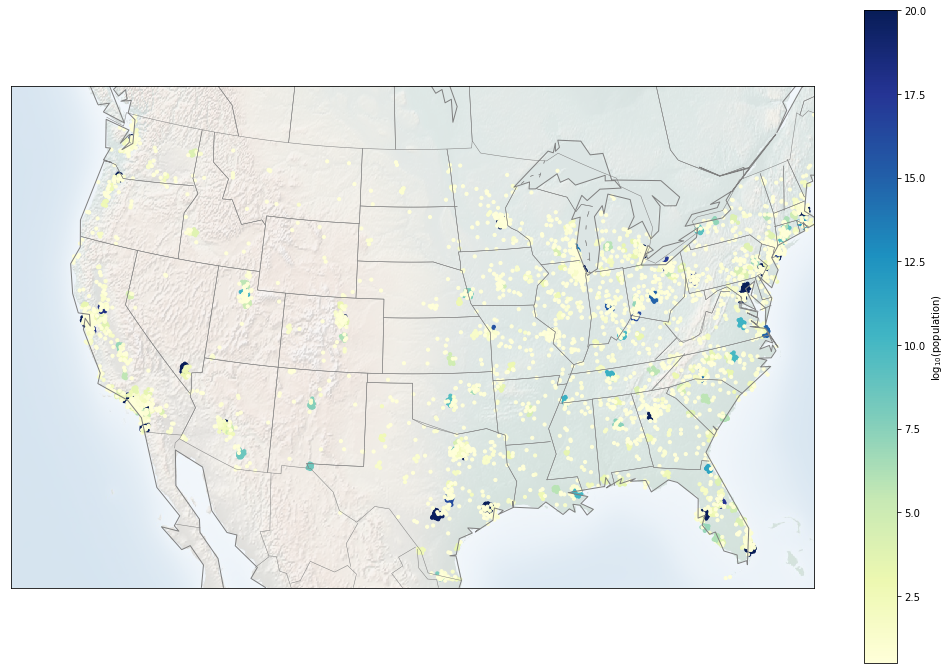

In [124]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap


#contacts
#contacts = output
contacts = minoputputwithnoise
lat = contacts['lat'].values
lon = contacts['lng'].values
population = contacts['population'].values
area = contacts['density'].values

# 1. Draw the map background
fig = plt.figure(figsize=(18, 12))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m.shadedrelief(alpha=0.3)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')



# 2. scatter city data, with color reflecting population and size reflecting area

m.scatter(lon, lat, latlon=True,
          #c=np.log10(population), s=area,
          #c=np.log10(population), s=8,
          c=population/100000, s=10,
          cmap='YlGnBu', alpha=1.0)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(0.5, 20)


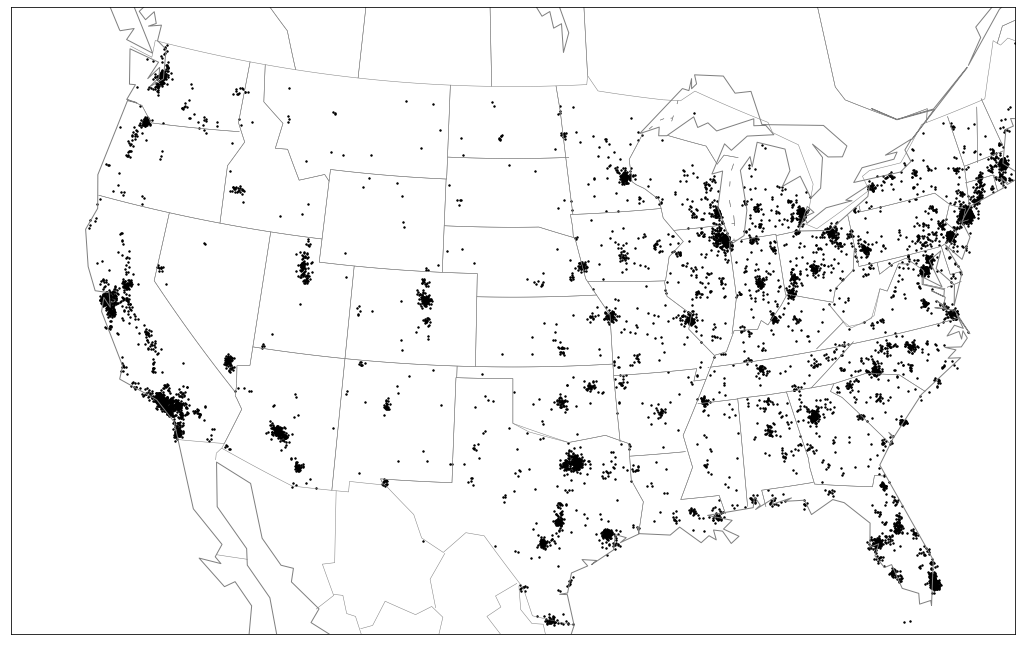

In [125]:
# 1. Draw the map background
fig2 = plt.figure(figsize=(18, 12))
m2 = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m2.drawcoastlines(color='gray')
m2.drawcountries(color='gray')
m2.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m2.scatter(lon, lat, latlon=True,
          #c=np.log10(population), s=area,
          c='black', s=2)

In [129]:
from sklearn import cluster

# reduce data frame to just lat and long and convert to an array
dk = contacts[['lat','lng']].values 

k_means2 = cluster.KMeans(n_clusters=15)
k_means2.fit(dk)
#print(k_means2.labels_[::1])
assignment_arr = k_means2.labels_
centers_arr = k_means2.cluster_centers_
print('assignments:\n', assignment_arr)
print('centers:\n',centers_arr)


assignments:
 [12  3  3 ... 12  4  3]
centers:
 [[  41.02407674  -82.40059247]
 [  34.09440796 -117.75869387]
 [  40.6251279   -74.33632729]
 [  31.59063724  -96.90822137]
 [  27.24981395  -81.18382465]
 [  46.43785766 -121.61887215]
 [  21.33794614 -157.85980101]
 [  33.43535909 -110.96864699]
 [  42.34816578  -94.47255533]
 [  34.55255983  -81.97628512]
 [  37.92830219 -121.77688122]
 [  33.37461821  -88.6864441 ]
 [  40.43001561 -107.60055656]
 [  41.16967605  -87.91281647]
 [  61.94716782 -149.24615048]]


In [130]:
#columns name
columns_new = ['cluster_id']

#created the data frame
assign_df = pd.DataFrame(assignment_arr, columns=columns_new)
#assign_df 

#join the old data frame d6, with the new assignment data frame
df7 = pd.concat([contacts,assign_df], axis=1, join_axes=[contacts.index])
#df7.dtypes

#now Lets Make a DF for the centers . , lat is 40
center_columns_new = ['lat', 'lng']
df_centers = pd.DataFrame(centers_arr,columns=center_columns_new)
df_centers.index.values

df7

,LastName,population,density,city,state_id,key,lat,lng,cluster_id
0,Leuschke,4900.0,202.0,Tucumcari,NM,0,35.289932,-103.764437,12
1,Champlin,5634307.0,1490.0,Dallas,TX,1,32.730231,-96.886658,3
2,Jacobi,5634307.0,1490.0,Dallas,TX,2,32.785296,-96.707804,3
3,Johnson,5634307.0,1490.0,Dallas,TX,3,32.717492,-96.789688,3
4,Cartwright,5634307.0,1490.0,Dallas,TX,4,32.717389,-96.666728,3
5,Wintheiser,5634307.0,1490.0,Dallas,TX,5,32.579783,-96.707895,3
6,Monahan,5634307.0,1490.0,Dallas,TX,6,32.870757,-96.710380,3
7,Halvorson,5634307.0,1490.0,Dallas,TX,7,32.952486,-96.512066,3
8,Legros,5634307.0,1490.0,Dallas,TX,8,32.809596,-96.901806,3
9,Kris,5634307.0,1490.0,Dallas,TX,9,32.781726,-96.815064,3


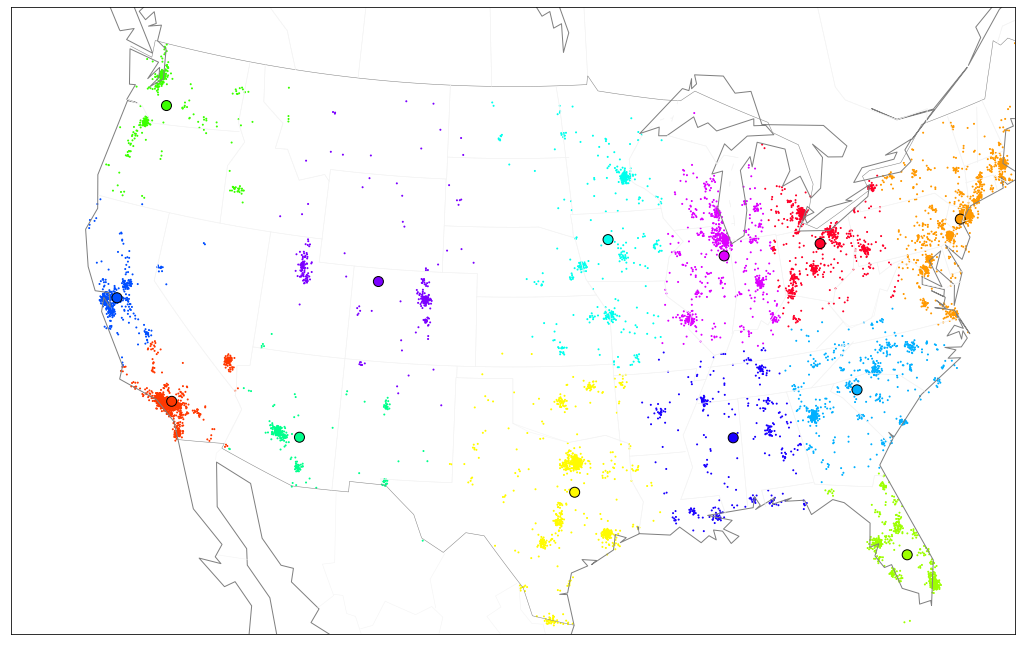

In [131]:
# 1. Draw the map background
fig3 = plt.figure(figsize=(18, 12))
m3 = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m3.drawcoastlines(color='gray')
m3.drawcountries(color='gray')
m3.drawstates(color='#F3F3F3')

lat3 = df7['lat'].values
lon3 = df7['lng'].values
cluster3 = df7['cluster_id'].values

# 2. scatter city data, with color reflecting population
m3.scatter(lon3, lat3, latlon=True,
          #c=np.log10(population), s=area,
            cmap='gist_rainbow', alpha=1.0,
          c=cluster3, s=1)

m3.scatter(df_centers['lng'].values, df_centers['lat'].values, latlon=True, 
           cmap='gist_rainbow', s=100, c=df_centers.index, edgecolors='Black')